In [165]:
# calculate annual total fossil fuel emission for 
# ODIAC and EDGAR5
# and compare

In [166]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"

from matplotlib import rcParams
rcParams["savefig.dpi"] = 300
rcParams["font.size"] = 12

import warnings
warnings.filterwarnings('ignore')

In [167]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from util.functions import area_latlon
from util.gamap_colormap import WhGrYlRd

In [168]:
# Pick two location and compare seasonality
loc1 = [51.5,-0.13] # London: 51.5074° N, 0.1278° W
loc2 = [48.9,2.35]  # Paris: 48.8566° N, 2.3522° E
loc3 = [31.2,121.5] # Shanghai: 31.2304° N, 121.4737° E
loc4 = [-37.8,145.0] # Melbourne: 37.8136° S, 144.9631° E
seasonal1 = np.zeros(12*2).reshape(2,12)
seasonal2 = np.zeros(12*2).reshape(2,12)
seasonal3 = np.zeros(12*2).reshape(2,12)
seasonal4 = np.zeros(12*2).reshape(2,12)

In [169]:
# EDGAR
input_file = '/geos/u73/msadiq/GEOS-Chem/HEMCO/CO2/v2019-12/EDGAR_monthly_2018_1x1.nc'
lat_res = 1.
lon_res = 1.
varname = 'emi_co2'
output_edgar = np.zeros(12)

In [170]:
tmp = xr.open_dataset(input_file)
tmp['emi_co2'] #.attrs#['global_total'] #['intl_bunker'][:,:,1].plot()

<xarray.DataArray 'emi_co2' (time: 12, lat: 180, lon: 360)>
[777600 values with dtype=float32]
Coordinates:
  * lon      (lon) float32 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * time     (time) datetime64[ns] 2014-01-01 2014-02-01 ... 2014-12-01
Attributes:
    long_name:  EDGAR fossil fuel CO2 from Mehliyar Sadiq
    units:      kg/m2/s

In [171]:
days_in_month = [31,28,31,30,31,30,31,31,30,31,30,31]
ds_EDGAR = xr.open_dataset(input_file)
data = ds_EDGAR[varname].copy()

seasonal1[0] = data.sel(lat = loc1[0], lon = loc1[1], method='nearest').values
seasonal2[0] = data.sel(lat = loc2[0], lon = loc2[1], method='nearest').values
seasonal3[0] = data.sel(lat = loc3[0], lon = loc3[1], method='nearest').values
seasonal4[0] = data.sel(lat = loc4[0], lon = loc4[1], method='nearest').values

for imonth in range(12):
    for ilat, lat in enumerate(data.lat):
        area_tmp = area_latlon(lat1 = lat, 
                               lon1 = data.lon[10].values, 
                               lat2 = lat + lat_res, 
                               lon2 = data.lon[10].values + lon_res)
        data[imonth,ilat,:] = data[imonth,ilat,:]*area_tmp*3600*24*days_in_month[imonth]*1e6 # unit: kgCO2/month 

monthly_edgar = data.sum(dim=['lat','lon'])*1e-12*12/44 # GtC/month
monthly_edgar

<xarray.DataArray 'emi_co2' (time: 12)>
array([0.8584026 , 0.81390136, 0.8686914 , 0.8146694 , 0.8260441 ,
       0.816172  , 0.82801116, 0.83691496, 0.8134514 , 0.84838563,
       0.85217786, 0.912018  ], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2014-01-01 2014-02-01 ... 2014-12-01

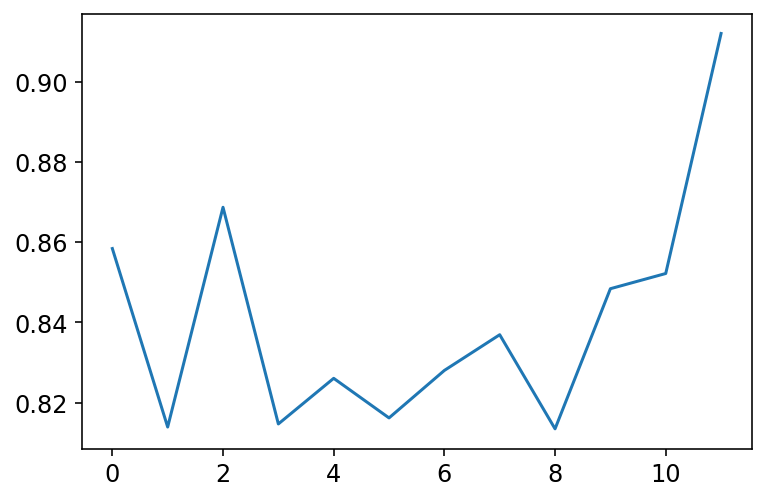

In [172]:
plt.plot(monthly_edgar)

In [173]:
# ODIAC
input_file = '/exports/csce/datastore/geos/users/msadiq/odiac/odiac2019_1x1d_2018.nc'
lat_res = 1.
lon_res = 1.
varname1 = 'land'
varname2 = 'intl_bunker'

In [174]:
tmp = xr.open_dataset(input_file)
tmp['land'] #.attrs#['global_total'] #['intl_bunker'][:,:,1].plot()

<xarray.DataArray 'land' (month: 12, lat: 180, lon: 360)>
[777600 values with dtype=float32]
Coordinates:
  * lon      (lon) float64 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * month    (month) int32 1 2 3 4 5 6 7 8 9 10 11 12
Attributes:
    units:       gC/m2/d
    long_name:   ffco2_emission
    definition:  CO2 emissions from fossil fuel combustion, cememt production...

In [175]:
ds_data = xr.open_dataset(input_file)
data = ds_data[varname1] + ds_data[varname2]

seasonal1[1] = data.sel(lat = loc1[0], lon = loc1[1], method='nearest').values*1e-3*44/12/(24*3600)
seasonal2[1] = data.sel(lat = loc2[0], lon = loc2[1], method='nearest').values*1e-3*44/12/(24*3600)
seasonal3[1] = data.sel(lat = loc3[0], lon = loc3[1], method='nearest').values*1e-3*44/12/(24*3600)
seasonal4[1] = data.sel(lat = loc4[0], lon = loc4[1], method='nearest').values*1e-3*44/12/(24*3600)

days_in_month = [31,28,31,30,31,30,31,31,30,31,30,31]
for ilat, lat in enumerate(data.lat):
    for imonth in range(12):
        area_tmp = area_latlon(lat1 = lat, 
                                lon1 = data.lon[10].values, 
                                lat2 = lat + lat_res, 
                                lon2 = data.lon[10].values + lon_res)
        data[imonth, ilat,:] = data[imonth, ilat,:] * area_tmp * days_in_month[imonth] *1e-3 # unit: kgCO2/month
        

monthly_odiac = data.sum(dim=['lat','lon'])*1e-6 # GtC/month
monthly_odiac


<xarray.DataArray (month: 12)>
array([0.85112053, 0.7929644 , 0.85368186, 0.8021377 , 0.8071272 ,
       0.80281556, 0.82069445, 0.8246059 , 0.8066168 , 0.83792645,
       0.8444546 , 0.90348333], dtype=float32)
Coordinates:
  * month    (month) int32 1 2 3 4 5 6 7 8 9 10 11 12

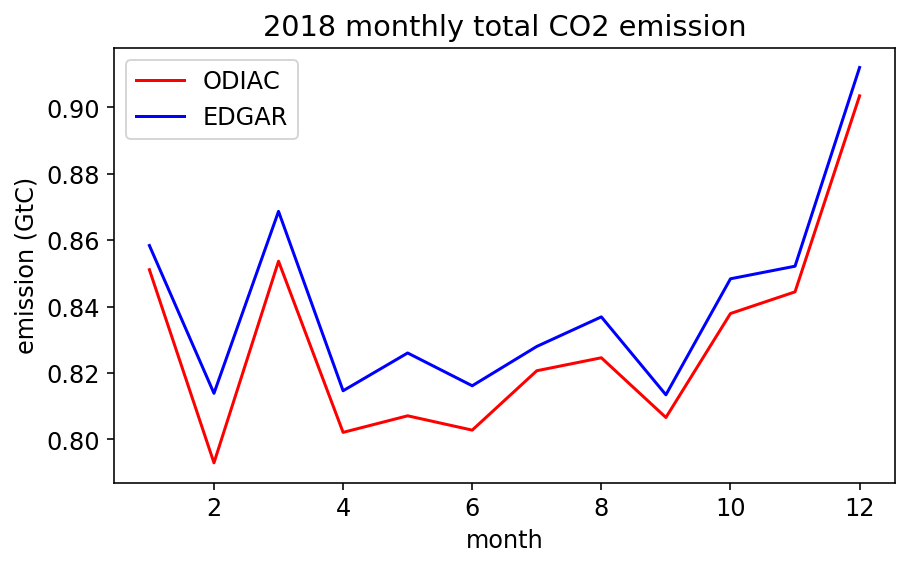

In [179]:
fig = plt.figure(figsize=[7, 4])
plt.title('2018 monthly total CO2 emission')
plt.plot(range(1,13), monthly_odiac, 'r', label = 'ODIAC')
plt.plot(range(1,13), monthly_edgar, 'b', label = 'EDGAR')
plt.ylabel('emission (GtC)')
plt.xlabel('month')
plt.legend()

fig.savefig('/geos/u73/msadiq/GEOS-Chem/analysis/inversion/data/monthly_co2.png', dpi=300)

In [177]:
seasonal1 = seasonal1*1e7
seasonal2 = seasonal2*1e7
seasonal3 = seasonal3*1e7
seasonal4 = seasonal4*1e7

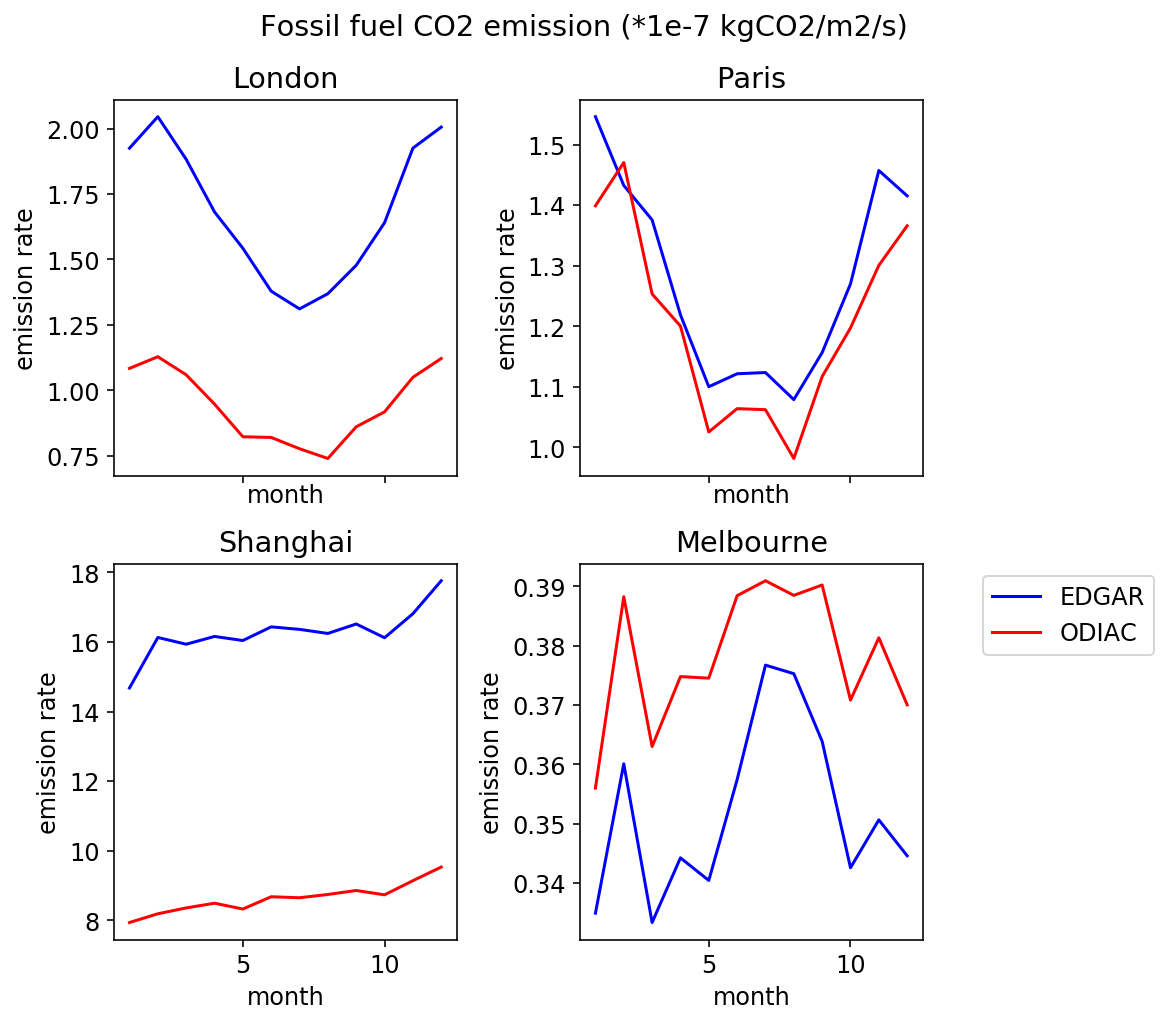

In [178]:

fig, axs = plt.subplots(2, 2, sharex=True, figsize = [8,7], 
                        constrained_layout=True)

fig.suptitle('Fossil fuel CO2 emission (*1e-7 kgCO2/m2/s)')

axs[0,0].plot(range(1,13), seasonal1[0], 'b', label = 'EDGAR')
axs[0,0].plot(range(1,13), seasonal1[1], 'r', label = 'ODIAC')
axs[0,0].set_title('London')

axs[0,1].plot(range(1,13), seasonal2[0], 'b', label = 'EDGAR')
axs[0,1].plot(range(1,13), seasonal2[1], 'r', label = 'ODIAC')
axs[0,1].set_title('Paris')

axs[1,0].plot(range(1,13), seasonal3[0], 'b', label = 'EDGAR')
axs[1,0].plot(range(1,13), seasonal3[1], 'r', label = 'ODIAC')
axs[1,0].set_title('Shanghai')

axs[1,1].plot(range(1,13), seasonal4[0], 'b', label = 'EDGAR')
axs[1,1].plot(range(1,13), seasonal4[1], 'r', label = 'ODIAC')
axs[1,1].set_title('Melbourne')

for ax in axs.flat:
    ax.set(xlabel='month', ylabel='emission rate')

plt.legend(bbox_to_anchor=(1.14,1), loc="upper left")

fig.savefig('/geos/u73/msadiq/GEOS-Chem/analysis/inversion/data/4cities_co2.png', dpi=300)